In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install dependencies (if required)
!pip install opencv-python-headless pillow tensorflow

import cv2
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from PIL import Image
import tkinter as tk
from tkinter import messagebox
from PIL import ImageTk

In [ ]:
# Load dataset from Google Drive
dataset_path = "/content/drive/MyDrive/Copy of AD Dataset Attire final(1).xlsx"  # Update this path
data = pd.read_excel(dataset_path)

In [ ]:
data.head()

,Body Image Path,Attire Image Path,Gender,State
0,https://drive.google.com/file/d/1dXyv1JDX0iXPn...,https://drive.google.com/file/d/1wbQo5qY7fA2DI...,Female,Andhra Pradesh
1,https://drive.google.com/file/d/1dXyv1JDX0iXPn...,https://drive.google.com/file/d/1zTYNwS7FQKhU5...,Female,Arunachal Pradesh
2,https://drive.google.com/file/d/1dXyv1JDX0iXPn...,https://drive.google.com/file/d/1zTYNwS7FQKhU5...,Female,Assam
3,https://drive.google.com/file/d/1dXyv1JDX0iXPn...,https://drive.google.com/file/d/1vZYkGqw1W_Ugc...,Female,Bihar
4,https://drive.google.com/file/d/1dXyv1JDX0iXPn...,https://drive.google.com/file/d/1xcPP4KwIeiJ_s...,Female,Chhattisgarh


In [ ]:
data.tail()

,Body Image Path,Attire Image Path,Gender,State
53,https://drive.google.com/file/d/1MCg9K3w6Mr065...,https://drive.google.com/file/d/163ai_ZjD_4ay5...,Male,Telangana
54,https://drive.google.com/file/d/1MCg9K3w6Mr065...,https://drive.google.com/file/d/1tdxmdS0tF_Z9S...,Male,Tripura
55,https://drive.google.com/file/d/1MCg9K3w6Mr065...,https://drive.google.com/file/d/1kR0u8kMaKlZ4Z...,Male,Uttar Pradesh
56,https://drive.google.com/file/d/1MCg9K3w6Mr065...,https://drive.google.com/file/d/1wDgWL72l26M1h...,Male,Uttarakhand
57,https://drive.google.com/file/d/1MCg9K3w6Mr065...,https://drive.google.com/file/d/1bB1qaIx8LDXXo...,Male,West Bengal


In [ ]:
print(data.columns)

Index(['Body Image Path', 'Attire Image Path', 'Gender ', 'State'], dtype='object')


In [ ]:
# Rename columns if necessary to match expected names
data.columns = ["Body Image Path", "Attire Image Path", "Gender", "State"]

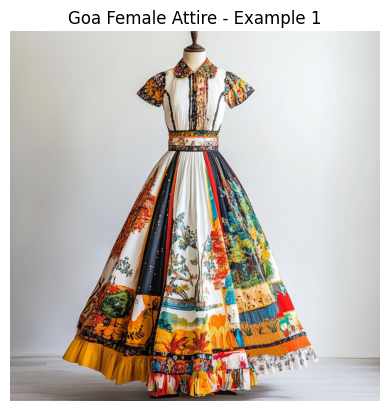

      Attire Image Path
0  /content/Goa (1).png


In [ ]:
# prompt: for the above code i want to see the goa attire here as an ouput itself...no drive link

import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = {'Attire Image Path': ['/content/Goa (1).png'],
        'Gender': ['Female'],
        'State': ['Goa']}
data = pd.DataFrame(data)

# Filter for female attire from Goa
goa_female_attire = data[(data['State'] == 'Goa') & (data['Gender'] == 'Female')]

# Display a few example images (replace with actual image paths)
num_images_to_display = min(5, len(goa_female_attire))  # Limit to 5 or fewer
for i in range(num_images_to_display):
  # Placeholder for image display – replace with your actual image loading
  plt.imshow(plt.imread('/content/Goa (1).png')) #Replace placeholder.png with an actual image path
  plt.title(f"Goa Female Attire - Example {i+1}")
  plt.axis('off')
  plt.show()

print(goa_female_attire[['Attire Image Path']])

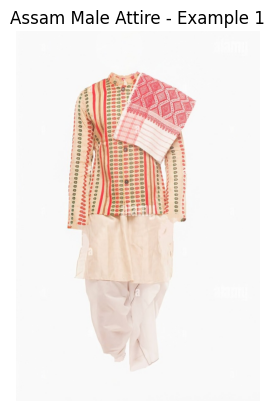

        Attire Image Path
0  /content/Assam (1).jpg


In [ ]:
# Sample data (replace with your actual data)
data = {'Attire Image Path': ['/content/Assam (1).jpg'],
        'Gender': ['Male'],
        'State': ['Assam']}
data = pd.DataFrame(data)

# Filter for male attire from Assam
assam_male_attire = data[(data['State'] == 'Assam') & (data['Gender'] == 'Male')]

# Display a few example images (replace with actual image paths)
num_images_to_display = min(5, len(assam_male_attire))  # Limit to 5 or fewer
for i in range(num_images_to_display):
  # Placeholder for image display – replace with your actual image loading
  plt.imshow(plt.imread('/content/Assam (1).jpg')) #Replace placeholder.png with an actual image path
  plt.title(f"Assam Male Attire - Example {i+1}")
  plt.axis('off')
  plt.show()

print(assam_male_attire[['Attire Image Path']])

In [ ]:
from PIL import Image as PILImage # use this alias for Pillow's Image
# Import Matplotlib for display
import matplotlib.pyplot as plt
import requests
from io import BytesIO

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


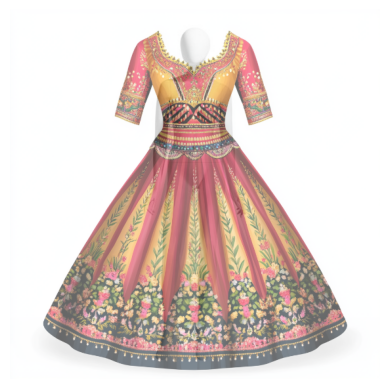

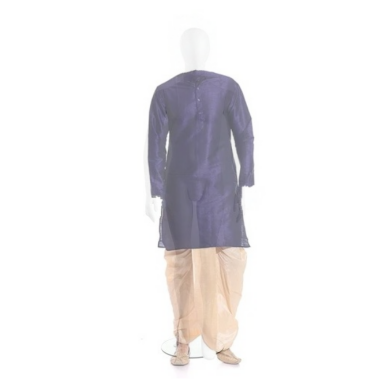

In [ ]:
from google.colab import drive
import cv2
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from PIL import Image
import matplotlib.pyplot as plt

drive.mount('/content/drive')

def overlay_attire(user_body_image_path, attire_image_path, alpha=0.6):
    """Overlays attire on user's body image with transparency and resizing.

    Args:
        user_body_image_path: Path to the user's body image.
        attire_image_path: Path to the attire image.
        alpha: Transparency factor for overlaying (0.0 - fully transparent, 1.0 - fully opaque).

    Returns:
        The overlayed image as a NumPy array, or None if overlay fails.
    """
    try:
        # Load images using OpenCV
        user_body_image = cv2.imread(user_body_image_path)
        attire_image = cv2.imread(attire_image_path)

        # Check if images loaded successfully
        if user_body_image is None:
            print(f"Error: User body image not found at path {user_body_image_path}")
            return None
        if attire_image is None:
            print(f"Error: Attire image not found at path {attire_image_path}")
            return None

        # Get the dimensions of the body image
        body_height, body_width = user_body_image.shape[:2]

        # Resize the attire image to fit the body image while maintaining aspect ratio
        attire_height, attire_width = attire_image.shape[:2]
        aspect_ratio = attire_width / attire_height

        # Calculate new dimensions based on body height, ensuring attire doesn't exceed body width
        new_attire_width = min(int(body_height * aspect_ratio), body_width)
        new_attire_height = int(new_attire_width / aspect_ratio)


        attire_image_resized = cv2.resize(attire_image, (new_attire_width, new_attire_height))

        # Calculate offsets to center the attire
        y_offset = (body_height - new_attire_height) // 2
        x_offset = (body_width - new_attire_width) // 2


        # Overlay the resized attire onto the body image with transparency
        # Handle cases where the attire might be slightly larger than the ROI
        y1 = max(0, y_offset)
        y2 = min(body_height, y_offset + new_attire_height)
        x1 = max(0, x_offset)
        x2 = min(body_width, x_offset + new_attire_width)

        attire_y1 = max(0, -y_offset)
        attire_y2 = attire_y1 + (y2 - y1)
        attire_x1 = max(0, -x_offset)
        attire_x2 = attire_x1 + (x2 - x1)

        user_body_image[y1:y2, x1:x2] = cv2.addWeighted(user_body_image[y1:y2, x1:x2], 1 - alpha, attire_image_resized[attire_y1:attire_y2, attire_x1:attire_x2], alpha, 0)

        return user_body_image

    except Exception as e:
        print(f"Error in overlay_attire: {e}")
        return None

# Example usage:
attire_image_path = '/content/Madhya Pradesh.png'  # Replace with the actual path to your attire image
user_body_image_path = '/content/@Body image Female.jpg'  # Replace with the actual path to your body image

try_on_image = overlay_attire(user_body_image_path, attire_image_path)

if try_on_image is not None:
    plt.imshow(cv2.cvtColor(try_on_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("Overlay process failed.")

# Example usage with another image
attire_image_path = '/content/West Bengal.jpg'
user_body_image_path = '/content/@Body Image Male.jpg'

try_on_image = overlay_attire(user_body_image_path, attire_image_path)

if try_on_image is not None:
    plt.imshow(cv2.cvtColor(try_on_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("Overlay process failed.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


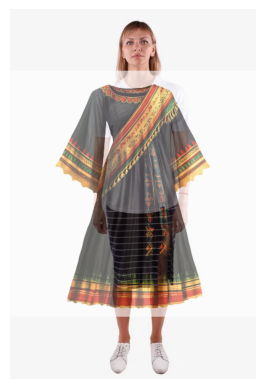

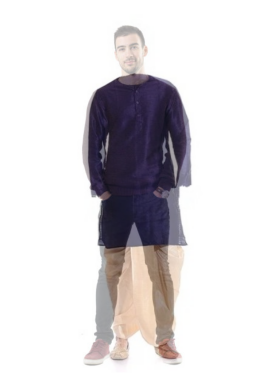

In [ ]:
from google.colab import drive
import cv2
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models
from PIL import Image
import matplotlib.pyplot as plt

drive.mount('/content/drive')

def overlay_attire(user_body_image_path, attire_image_path, alpha=0.6):
    """Overlays attire on user's body image with transparency and resizing.

    Args:
        user_body_image_path: Path to the user's body image.
        attire_image_path: Path to the attire image.
        alpha: Transparency factor for overlaying (0.0 - fully transparent, 1.0 - fully opaque).

    Returns:
        The overlayed image as a NumPy array, or None if overlay fails.
    """
    try:
        # Load images using OpenCV
        user_body_image = cv2.imread(user_body_image_path)
        attire_image = cv2.imread(attire_image_path)

        # Check if images loaded successfully
        if user_body_image is None:
            print(f"Error: User body image not found at path {user_body_image_path}")
            return None
        if attire_image is None:
            print(f"Error: Attire image not found at path {attire_image_path}")
            return None

        # Get the dimensions of the body image
        body_height, body_width = user_body_image.shape[:2]

        # Resize the attire image to fit the body image while maintaining aspect ratio
        attire_height, attire_width = attire_image.shape[:2]
        aspect_ratio = attire_width / attire_height

        # Calculate new dimensions based on body height, ensuring attire doesn't exceed body width
        new_attire_width = min(int(body_height * aspect_ratio), body_width)
        new_attire_height = int(new_attire_width / aspect_ratio)


        attire_image_resized = cv2.resize(attire_image, (new_attire_width, new_attire_height))

        # Calculate offsets to center the attire
        y_offset = (body_height - new_attire_height) // 2
        x_offset = (body_width - new_attire_width) // 2


        # Overlay the resized attire onto the body image with transparency
        # Handle cases where the attire might be slightly larger than the ROI
        y1 = max(0, y_offset)
        y2 = min(body_height, y_offset + new_attire_height)
        x1 = max(0, x_offset)
        x2 = min(body_width, x_offset + new_attire_width)

        attire_y1 = max(0, -y_offset)
        attire_y2 = attire_y1 + (y2 - y1)
        attire_x1 = max(0, -x_offset)
        attire_x2 = attire_x1 + (x2 - x1)

        user_body_image[y1:y2, x1:x2] = cv2.addWeighted(user_body_image[y1:y2, x1:x2], 1 - alpha, attire_image_resized[attire_y1:attire_y2, attire_x1:attire_x2], alpha, 0)

        return user_body_image

    except Exception as e:
        print(f"Error in overlay_attire: {e}")
        return None

# Example usage:
attire_image_path = '/content/Nagaland.png'  # Replace with the actual path to your attire image
user_body_image_path = '/content/wmodel4.jpg'  # Replace with the actual path to your body image

try_on_image = overlay_attire(user_body_image_path, attire_image_path)

if try_on_image is not None:
    plt.imshow(cv2.cvtColor(try_on_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("Overlay process failed.")

# Example usage with another image
attire_image_path = '/content/West Bengal.jpg'
user_body_image_path = '/content/malemodel5.jpg'

try_on_image = overlay_attire(user_body_image_path, attire_image_path)

if try_on_image is not None:
    plt.imshow(cv2.cvtColor(try_on_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("Overlay process failed.")